In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [3]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)
titanic = pd.get_dummies(data = titanic, drop_first = True, columns = ['Sex','Embarked', 'Pclass', 'SibSp'])
titanic.drop(['Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
titanic.dropna(inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split (titanic[['Age','Parch','Fare','Pclass_2','Pclass_3','Sex_male','SibSp_1',
                                                             'SibSp_2','SibSp_3','SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_Q',
                                                             'Embarked_S']], titanic['Survived'], test_size = 0.30, random_state = 101)

In [5]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Probability

In [6]:
probab = logmodel.predict_proba(X_test)

In [7]:
probab

array([[0.8988063 , 0.1011937 ],
       [0.86705571, 0.13294429],
       [0.20132013, 0.79867987],
       [0.09261084, 0.90738916],
       [0.86496643, 0.13503357],
       [0.96431496, 0.03568504],
       [0.88809974, 0.11190026],
       [0.76769146, 0.23230854],
       [0.92749528, 0.07250472],
       [0.32938322, 0.67061678],
       [0.22855358, 0.77144642],
       [0.04147992, 0.95852008],
       [0.89883888, 0.10116112],
       [0.34001604, 0.65998396],
       [0.89849948, 0.10150052],
       [0.88101565, 0.11898435],
       [0.11001511, 0.88998489],
       [0.13781042, 0.86218958],
       [0.39204728, 0.60795272],
       [0.90528267, 0.09471733],
       [0.89867679, 0.10132321],
       [0.88079913, 0.11920087],
       [0.65240467, 0.34759533],
       [0.72177914, 0.27822086],
       [0.90740538, 0.09259462],
       [0.51619759, 0.48380241],
       [0.41046675, 0.58953325],
       [0.4283991 , 0.5716009 ],
       [0.86785632, 0.13214368],
       [0.68994118, 0.31005882],
       [0.

In [8]:
prediksi = logmodel.predict(X_test)
prediksi

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Logit (Binary Logistic Regression)

In [9]:
import statsmodels.api as sm
logit = sm.Logit(Y_train, sm.add_constant(X_train))

In [10]:
hasil = logit.fit()

         Current function value: 0.442883
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      607
Method:                           MLE   Df Model:                           14
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.3328
Time:                        20:59:46   Log-Likelihood:                -275.47
converged:                      False   LL-Null:                       -412.87
Covariance Type:            nonrobust   LLR p-value:                 2.082e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9965      0.591      6.766      0.000       2.839       5.154
Age           -0.0434      0.010     -4.200      0.000      -0.064      -0.023
Parch         -0.1127      0.144     -0.782      0.434      -0.395       0.170
Fare           0.0016      0.003      0.567      0.571      -0.004       0.007
Pclass_2      -1.0265      0.363     -2.824      0.005      -1.739      -0.314
Pclass_3      -2.2255      0.366     -6.077      0.000      -2.943      -1.508
Sex_male      -2.5839      0.237    -10.897      0.000      -3.049      -2.119
SibSp_1        0.0709      0.257      0.276      0.782      -0.432       0.574
SibSp_2       -0.3309      0.566     -0.584      0.559      -1.441       0.779
SibSp_3       -1.2621      1.014     -1.245      0.213      -3.250       0.725
SibSp_4       -1.0252      0.787     -1.303      0.192      -2.567       0.516
SibSp_5      -12.4512    330.251     -0.038      0.970    -659.731     634.828
SibSp_8      -25.8847   3.38e+05  -7.66e-05      1.000   -6.62e+05    6.62e+05
Embarked_Q    -0.1157      0.457     -0.253      0.800      -1.012       0.781
Embarked_S    -0.3539      0.293     -1.208      0.227      -0.928       0.220
==============================================================================
"""

In [12]:
logit_fix = sm.Logit(Y_train, sm.add_constant(X_train[['Age','Pclass_2','Pclass_3','Sex_male']]))
hasil_fix = logit_fix.fit()
hasil_fix.summary()

Optimization terminated successfully.
         Current function value: 0.453663
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.3165
Time:                        20:59:46   Log-Likelihood:                -282.18
converged:                       True   LL-Null:                       -412.87
Covariance Type:            nonrobust   LLR p-value:                 2.293e-55
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6292      0.464      7.828      0.000       2.721       4.538
Age           -0.0381      0.010     -3.976      0.000      -0.057      -0.019
Pclass_2      -1.1861      0.313     -3.791      0.000      -1.799      -0.573
Pclass_3      -2.4114      0.301     -8.001      0.000      -3.002      -1.821
Sex_male      -2.5327      0.220    -11.489      0.000      -2.965      -2.101
==============================================================================
"""

In [13]:
logmodel_fix = LogisticRegression()
logmodel_fix.fit(X_train[['Age','Pclass_2','Pclass_3','Sex_male']], Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logmodel_fix.predict_proba(X_test[['Age','Pclass_2','Pclass_3','Sex_male']])

array([[0.8943523 , 0.1056477 ],
       [0.8943523 , 0.1056477 ],
       [0.1882185 , 0.8117815 ],
       [0.13709355, 0.86290645],
       [0.8943523 , 0.1056477 ],
       [0.96002501, 0.03997499],
       [0.8943523 , 0.1056477 ],
       [0.75518219, 0.24481781],
       [0.92257535, 0.07742465],
       [0.43857232, 0.56142768],
       [0.22157641, 0.77842359],
       [0.06967026, 0.93032974],
       [0.8943523 , 0.1056477 ],
       [0.43857232, 0.56142768],
       [0.8943523 , 0.1056477 ],
       [0.87707875, 0.12292125],
       [0.1145822 , 0.8854178 ],
       [0.19857785, 0.80142215],
       [0.43017293, 0.56982707],
       [0.90064077, 0.09935923],
       [0.8943523 , 0.1056477 ],
       [0.8943523 , 0.1056477 ],
       [0.60843608, 0.39156392],
       [0.67883643, 0.32116357],
       [0.83047416, 0.16952584],
       [0.51616479, 0.48383521],
       [0.49053101, 0.50946899],
       [0.49808839, 0.50191161],
       [0.79407725, 0.20592275],
       [0.67926222, 0.32073778],
       [0.

In [15]:
pred = logmodel_fix.predict(X_test[['Age','Pclass_2','Pclass_3','Sex_male']])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
ConfMat = pd.DataFrame (confusion_matrix(Y_test, pred))

In [18]:
ConfMat

,0,1
0,144,19
1,36,68


In [19]:
accuracy_score(Y_test, pred)

0.7940074906367042

## Latihan

In [111]:
anime = pd.read_csv('dataanime.csv')

In [112]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

In [113]:
anime.isnull().sum()

Title              0
Type               0
Episodes           0
Status             0
Start airing       0
End airing         0
Starting season    0
Broadcast time     0
Producers          0
Licensors          0
Studios            0
Sources            0
Genres             0
Duration           0
Rating             0
Score              0
Scored by          0
Members            0
Favorites          0
Description        0
dtype: int64

In [114]:
anime.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


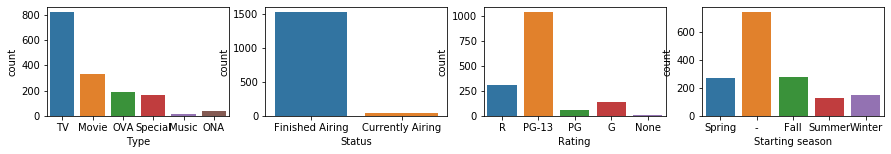

In [115]:
plt.figure(figsize=(15,2))
plt.subplot(1,4,1)
sns.countplot(anime['Type'])
plt.subplot(1,4,2)
sns.countplot(anime['Status'])
plt.subplot(1,4,3)
sns.countplot(anime['Rating'])
plt.subplot(1,4,4)
sns.countplot(anime['Starting season'])

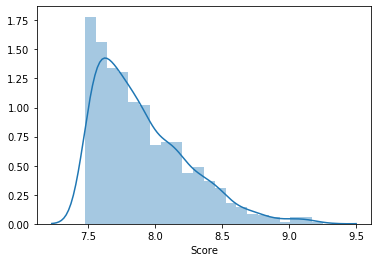

In [116]:
sns.distplot(anime['Score'])

In [117]:
(anime == '-').sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Title                 0
Type                  0
Episodes             11
Status                0
Start airing         14
End airing          585
Starting season     742
Broadcast time     1009
Producers           376
Licensors           607
Studios              46
Sources             100
Genres                0
Duration              4
Rating                0
Score                 0
Scored by             0
Members               0
Favorites             0
Description          12
dtype: int64

In [118]:
anime.drop(['Title','Episodes','Start airing','End airing','Broadcast time','Producers','Licensors','Studios','Sources','Genres','Duration','Description','Starting season'],axis=1,inplace=True)

In [119]:
anime.head()

,Type,Status,Rating,Score,Scored by,Members,Favorites
0,TV,Finished Airing,R,9.25,719706,1176368,105387
1,Movie,Finished Airing,PG-13,9.19,454969,705186,33936
2,TV,Finished Airing,R,9.16,70279,194359,5597
3,TV,Currently Airing,PG-13,9.16,12609,186331,1117
4,TV,Finished Airing,PG-13,9.14,552791,990419,90365


In [120]:
anime = pd.get_dummies(data = anime, drop_first = True, columns = ['Type','Status','Rating'])

In [121]:
anime.head()

,Score,Scored by,Members,Favorites,Type_Music,Type_ONA,Type_OVA,Type_Special,Type_TV,Status_Finished Airing,Rating_None,Rating_PG,Rating_PG-13,Rating_R
0,9.25,719706,1176368,105387,0,0,0,0,1,1,0,0,0,1
1,9.19,454969,705186,33936,0,0,0,0,0,1,0,0,1,0
2,9.16,70279,194359,5597,0,0,0,0,1,1,0,0,0,1
3,9.16,12609,186331,1117,0,0,0,0,1,0,0,0,1,0
4,9.14,552791,990419,90365,0,0,0,0,1,1,0,0,1,0


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (anime[['Score','Scored by','Members','Favorites',
                                                           'Type_Music','Type_ONA','Type_OVA','Type_Special','Type_TV',
                                                           'Rating_None','Rating_PG','Rating_PG-13','Rating_R']],
                                                            anime['Status_Finished Airing'],
                                                            test_size = 0.30, random_state = 101)

In [123]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
probab = logmodel.predict_proba(x_test)
probab

array([[1.30782718e-09, 9.99999999e-01],
       [7.22209372e-02, 9.27779063e-01],
       [4.10480591e-02, 9.58951941e-01],
       [1.12775218e-02, 9.88722478e-01],
       [1.46881502e-02, 9.85311850e-01],
       [3.74040984e-03, 9.96259590e-01],
       [4.27157127e-02, 9.57284287e-01],
       [4.20102686e-02, 9.57989731e-01],
       [1.23233259e-05, 9.99987677e-01],
       [2.82011874e-02, 9.71798813e-01],
       [2.62258312e-02, 9.73774169e-01],
       [1.75713564e-02, 9.82428644e-01],
       [9.14293572e-05, 9.99908571e-01],
       [1.97553100e-02, 9.80244690e-01],
       [1.60692012e-02, 9.83930799e-01],
       [4.54031563e-02, 9.54596844e-01],
       [7.18801155e-03, 9.92811988e-01],
       [2.19713742e-03, 9.97802863e-01],
       [2.74241973e-03, 9.97257580e-01],
       [4.28783389e-02, 9.57121661e-01],
       [2.48462233e-02, 9.75153777e-01],
       [3.08047548e-02, 9.69195245e-01],
       [5.39695360e-03, 9.94603046e-01],
       [9.38461646e-03, 9.90615384e-01],
       [1.049611

In [125]:
prediksi = logmodel.predict(x_test)
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [126]:
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(x_train))

In [127]:
hasil = logit.fit()

         Current function value: 1.089998
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [128]:
hasil.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Status_Finished Airing   No. Observations:                 1094
Model:                              Logit   Df Residuals:                     1080
Method:                               MLE   Df Model:                           13
Date:                    Wed, 12 Aug 2020   Pseudo R-squ.:                     inf
Time:                            21:44:21   Log-Likelihood:                -1192.5
converged:                          False   LL-Null:                        0.0000
Covariance Type:                nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.1597      6.154      1.326      0.185      -3.902      20.222
Score           -0.2677      0.766     -0.350      0.727      -1.768       1.233
Scored by        0.0001   2.74e-05      4.213      0.000    6.16e-05       0.000
Members      -2.732e-05    8.2e-06     -3.332      0.001   -4.34e-05   -1.12e-05
Favorites       -0.0004      0.000     -3.554      0.000      -0.001      -0.000
Type_Music      21.0607    1.8e+05      0.000      1.000   -3.52e+05    3.52e+05
Type_ONA        -3.6804      1.260     -2.920      0.003      -6.151      -1.210
Type_OVA        -1.6858      1.295     -1.302      0.193      -4.224       0.852
Type_Special    -0.9951      1.512     -0.658      0.511      -3.959       1.969
Type_TV         -2.2983      1.157     -1.987      0.047      -4.565      -0.031
Rating_None     -3.7203      1.829     -2.034      0.042      -7.305      -0.135
Rating_PG       -1.5130      1.267     -1.194      0.233      -3.997       0.971
Rating_PG-13    -1.1734      1.062     -1.104      0.269      -3.256       0.909
Rating_R        -0.7799      1.191     -0.655      0.513      -3.114       1.555
================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [136]:
logit_fix = sm.Logit(y_train, sm.add_constant(x_train[['Scored by','Members','Favorites']]))
hasil_fix = logit_fix.fit()
hasil_fix.summary()

Optimization terminated successfully.
         Current function value: 1.005240
         Iterations 11


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Status_Finished Airing   No. Observations:                 1094
Model:                              Logit   Df Residuals:                     1090
Method:                               MLE   Df Model:                            3
Date:                    Wed, 12 Aug 2020   Pseudo R-squ.:                     inf
Time:                            21:55:34   Log-Likelihood:                -1099.7
converged:                           True   LL-Null:                        0.0000
Covariance Type:                nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1139      0.277     11.243      0.000       2.571       3.657
Scored by      0.0001   2.51e-05      4.746      0.000       7e-05       0.000
Members    -3.123e-05   6.64e-06     -4.704      0.000   -4.42e-05   -1.82e-05
Favorites     -0.0004      0.000     -3.639      0.000      -0.001      -0.000
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [137]:
logmodel_fix = LogisticRegression()
logmodel_fix.fit(x_train[['Scored by','Members','Favorites']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
logmodel_fix.predict_proba(x_test[['Scored by','Members','Favorites']])

array([[1.74623893e-09, 9.99999998e-01],
       [6.67190664e-02, 9.33280934e-01],
       [3.82619764e-02, 9.61738024e-01],
       [1.54890408e-02, 9.84510959e-01],
       [1.56426401e-02, 9.84357360e-01],
       [3.89572277e-03, 9.96104277e-01],
       [4.31853546e-02, 9.56814645e-01],
       [3.72003582e-02, 9.62799642e-01],
       [1.89648476e-05, 9.99981035e-01],
       [2.52302535e-02, 9.74769747e-01],
       [2.80648603e-02, 9.71935140e-01],
       [1.96875817e-02, 9.80312418e-01],
       [1.08000180e-04, 9.99892000e-01],
       [1.98779826e-02, 9.80122017e-01],
       [1.75831575e-02, 9.82416842e-01],
       [4.15962228e-02, 9.58403777e-01],
       [6.94180433e-03, 9.93058196e-01],
       [2.34118598e-03, 9.97658814e-01],
       [3.10941933e-03, 9.96890581e-01],
       [4.48916645e-02, 9.55108335e-01],
       [2.21569213e-02, 9.77843079e-01],
       [2.89955642e-02, 9.71004436e-01],
       [5.25037956e-03, 9.94749620e-01],
       [8.92977337e-03, 9.91070227e-01],
       [1.451546

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [140]:
ConfMat = pd.DataFrame (confusion_matrix(Y_test, pred))

In [141]:
ConfMat

,0,1
0,144,19
1,36,68


In [142]:
accuracy_score(Y_test, pred)

0.7940074906367042